# Regression mit neuronalen Netzen
Auch wenn neuronale Netze nicht zu den klassischen Data-Science-Verfahren gehören, soll die Regression mit diesen kurz behandelt werden.

In [ ]:
import random

from ipywidgets import interact, IntSlider
import pandas as pd
import numpy as np
import plotly.express as px
import torch
import torch.nn as nn

from tui_dsg.regression import draw_nn_regression

## Inhaltsverzeichnis
- [Datensatz](#Datensatz)
- [Neuronale Netze](#Neuronale-Netze)

## Datensatz
Zunächst wird erneut ein künstlicher Datensatz erzeugt, der sich einer quadratischen Funktion annähert.

In [ ]:
np.random.seed(1)
random.seed(1)

df = pd.DataFrame({
    'x': (random.random() * 10 - 4 for _ in range(200))
})
df['y'] = 5 - 2 * df['x'] + df['x'] ** 2
df['y'] += np.random.normal(loc=0, scale=3, size=200)

px.scatter(df, x='x', y='y')

## Neuronale Netze
Im Folgenden verwenden wir eines der einfachsten Modelle eines neuronalen Netzes: Das Multilayer-Perzeptron. Dieses Modell besteht immer aus mehreren Schichten, nämlich einer Eingabeschicht, einer Ausgabeschicht und dazwischen mindestens einer versteckten Schicht. Die Schichten sind mit der jeweils nächsten vollständig verbunden, um - bildlich gesprochen - einen Fluss der Information zu ermöglichen.

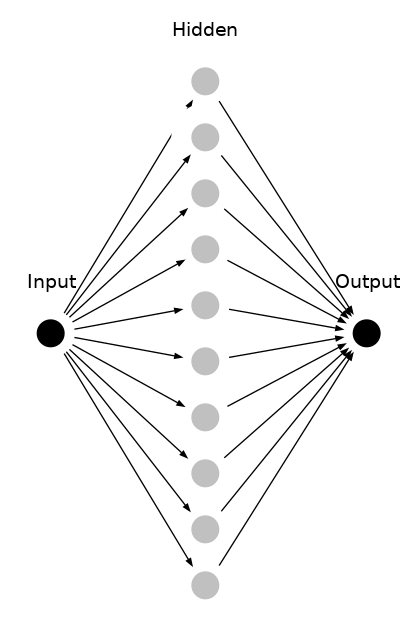

Die Eingabe besteht in diesem Fall aus dem $x$-Wert, während die Ausgabe den geschätzten $y$-Wert beschreibt. Die Verbindungen innerhalb des Netzwerks werden während des Trainings dabei so gewichtet, dass sich die tatsächliche Ausgabe der gewünschten annähert. (*Supervised Learning*) Eine Aktivierungsfunktion kann eingebracht werden, um komplexere Zusammenhänge zu lernen.

Die folgende Funktion definiert ein solches Modell und trainiert es anhand der übergebenen Daten.

In [ ]:
def train(df, num_epochs, hidden_neurons, learning_rate):
    # Model Definition
    model = nn.Sequential(
        nn.Linear(1, hidden_neurons),
        nn.ReLU(),
        nn.Linear(hidden_neurons, 1)
    )

    # Loss Function and Optimizer
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Epoch Loop
    yield model

    for epoch in range(1, num_epochs + 1):
        print('.', end='')

        # zero gradients
        optimizer.zero_grad()
        loss = 0

        # learn from samples
        for _, (x, y) in df.iterrows():
            x_t = torch.tensor([x])
            y_t = torch.tensor([y])

            y_pred = model(x_t)
            loss += loss_fn(y_pred, y_t)

        # backpropagation
        loss.backward()
        optimizer.step()

        # yield current model to create animation
        yield model

In der letzten Zelle dieses Notebooks haben Sie die Möglichkeit, den Lernerfolg dieses einfachen Netzes animiert zu betrachten. Sie können dabei auch die Anzah lder Epochen und die Anzahl der versteckten Neuronen anpassen.

In [ ]:
@interact(num_epochs=IntSlider(30, 30, 200, 10), hidden_neurons=IntSlider(20, 1, 200, 5))
def _(num_epochs, hidden_neurons):
    anim = draw_nn_regression(train, df, num_epochs=num_epochs, hidden_neurons=hidden_neurons, learning_rate=0.1)

    fig = px.scatter(anim, x='x', y='y', color='type', animation_frame='epoch', range_y=[-5, 35])
    fig.update_layout(showlegend=False)

    return fig